In [1]:
from functions import map_splitter, azure_maps_query
from secret import AZURE_MAP_KEY
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

In [2]:
pwd = os.getcwd()

coordinates = pd.read_csv(pwd + "/Square Builder.csv")

pwd = os.getcwd()

AZURE_MAP_KEY = AZURE_MAP_KEY

## To get your own Azure API key you can sign up [HERE](https://azure.microsoft.com/en-us/products/azure-maps)

#### You only pay for the services you use. Most hobby users can use it completely for free. You only start paying when you are hitting the API A LOT.


In [3]:
upper_left = [coordinates.iloc[0, 1], coordinates.iloc[0, 2]]
lower_left = [coordinates.iloc[1, 1], coordinates.iloc[1, 2]]
upper_right = [coordinates.iloc[2, 1], coordinates.iloc[2, 2]]
lower_right = [coordinates.iloc[3, 1], coordinates.iloc[3, 2]]

In [4]:
query_points = map_splitter(upper_left, upper_right, lower_right, step_size=.04)

query_points

[[np.float64(-121.59375), np.float64(38.68677)],
 [np.float64(-121.59375), np.float64(38.646770000000004)],
 [np.float64(-121.59375), np.float64(38.606770000000004)],
 [np.float64(-121.55375), np.float64(38.68677)],
 [np.float64(-121.55375), np.float64(38.646770000000004)],
 [np.float64(-121.55375), np.float64(38.606770000000004)],
 [np.float64(-121.51374999999999), np.float64(38.68677)],
 [np.float64(-121.51374999999999), np.float64(38.646770000000004)],
 [np.float64(-121.51374999999999), np.float64(38.606770000000004)],
 [np.float64(-121.56875), np.float64(38.661770000000004)]]

In [5]:
x = [z[0] for z in query_points]
y = [a[1] for a in query_points]

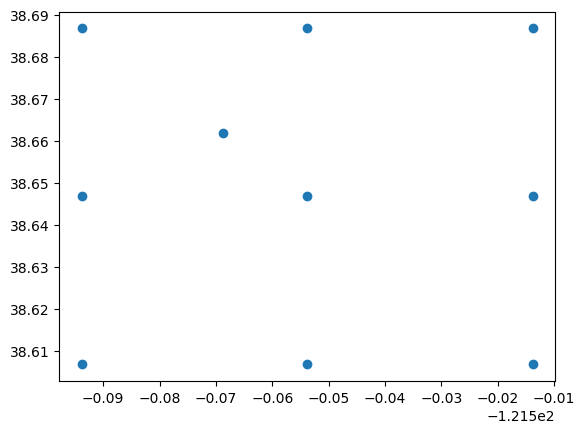

In [6]:
plt.scatter(x, y)

In [7]:
entity_input = str("school")
limit = 20
counter = 0
for i in query_points:
    to_save = azure_maps_query(i[0], i[1], limit, entity_input, AZURE_MAP_KEY)

    with open(pwd + f"/{str(counter)}.txt", 'w') as outfile:
        json.dump(to_save, outfile) # Save to make sure that I don't lose data

    counter += 1

In [10]:
data = []

# Loop through files and extract POIs
for i in range(0, 17):
    with open(f"{pwd}/{i}.txt") as f:
        json_data = json.load(f)
        results = json_data.get("results", [])

        for result in results:
                    poi = result.get("poi", {})
                    address = result.get("address", {})
                    full_address = address.get("freeformAddress", "Not Listed")

                    # Collecting necessary information
                    data.append({
                        "name": poi.get("name"),
                        "phone": poi.get("phone", "Not Listed"),
                        "url": poi.get("url", "Not Listed"),
                        "address": full_address
            })


In [11]:
data_df = pd.DataFrame(data)

data_df = data_df.drop_duplicates().reset_index(drop=True)

data_df.to_csv(pwd + '/output.csv', index=False) 

data_df

,name,phone,url,address
0,Natomas Middle School,+1 916-567-5540,www.natomasunified.org,"3200 North Park Drive, Sacramento, CA 95835"
1,H Allen Hight Elementary School,+1 916-567-5700,www.natomasunified.org,"3200 North Park Drive, Sacramento, CA 95835"
2,Heron K-8 School,+1 916-567-5680,natomas.k12.ca.us,"5151 Banfield Drive, Sacramento, CA 95835"
3,Witter Ranch Elementary School,+1 916-567-5620,natomas.k12.ca.us,"3790 Poppy Hill Way, Sacramento, CA 95834"
4,Inderkum High School,+1 916-567-5640,www.natomasunified.org,"2500 New Market Drive, Sacramento, CA 95835"
5,Natomas Pacific Pathways Prep School-Middle,+1 916-567-5740,www.natomasunified.org,"3700 Del Paso Road, Sacramento, CA 95834"
6,California Interscholastic Federation,+1 916-239-4477,www.ca-usaw.org,"4658 Duckhorn Drive, Sacramento, CA 95834"
7,Maryhill School,+1 916-575-9603,www.merryhillschool.com/preschools/sacramento/...,"2855 Karitsa Avenue, Sacramento, CA 95833"
8,Fortune School of Education,+1 916-924-8633,www.fortuneschool.us,"2890 Gateway Oaks Drive, Sacramento, CA 95833"
9,Natomas Unified School District,+1 916-567-5401,www.natomasschoolsfoundation.org,"1901 Arena Boulevard, Sacramento, CA 95834"
